#  DBSCAN


(500, 2)


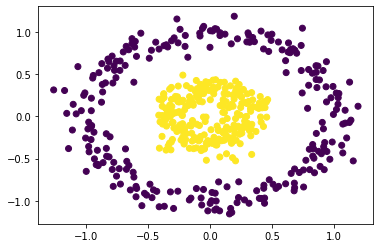

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import sklearn.datasets
from sklearn.utils import shuffle

# Let's generate a scatter plot composed of two circles
# The cloud contains 500 observations (`n_samples`) noisy by
# a Gaussian noise of standard deviation 0.1 (`noise`).
# The ratio between the radius of the small circle and the large circle
# is 0.3 (`factor`).
data, labels = sklearn.datasets.make_circles(n_samples=500, noise=0.1,
                                             factor=0.3, random_state=0)

print(data.shape)
# Random permutation of the rows of the matrix (the observations are mixed)
data, labels = shuffle(data, labels)

# Point cloud display
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [ ]:
import pandas as pd
print ("\nThere is summary of Dataset")
df= pd.DataFrame(data)


There is summary of Dataset


In [ ]:
df.describe()


,0,1
count,500.000000,500.000000
mean,-0.000291,-0.005997
std,0.532703,0.535659
min,-1.257591,-1.156390
25%,-0.317968,-0.327164
50%,0.001764,0.003564
75%,0.312240,0.327694
max,1.193240,1.188790


In [ ]:
df['y']=labels
df['y'].value_counts()

0    250
1    250
Name: y, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       500 non-null    float64
 1   1       500 non-null    float64
 2   y       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [ ]:
X=df.drop('y',axis=1)

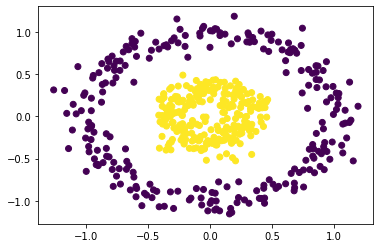

In [ ]:
# plot the data in 2 dimenion
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# The color of the points depends on their label
plt.scatter(data[:,0], data[:,1], c=labels)
plt.show()

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics


mkmeans = KMeans(n_clusters=2, n_init=1, init='k-means++').fit(data)
rkmeans = KMeans(n_clusters=2, n_init=1, init='random').fit(data)

print(f" k-means++ is {metrics.adjusted_rand_score(mkmeans.labels_,labels)}")
                                                                
print(f" random is {metrics.adjusted_rand_score(rkmeans.labels_, labels)}")
                                                             



 k-means++ is -0.0014288163391407002
 random is -0.0017510031159502055


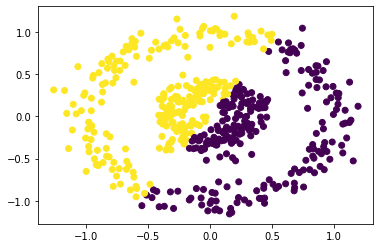

In [ ]:
#plot according to k-means++
plt.scatter(data[:,0], data[:,1],  c=mkmeans.labels_)
plt.show()

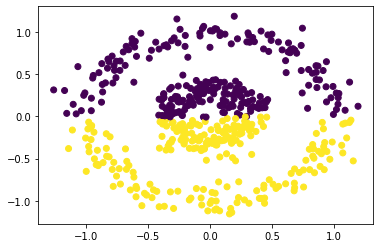

In [ ]:
#according to random

plt.scatter(data[:,0], data[:,1],  c=rkmeans.labels_)
plt.show()

Text(0, 0.5, 'score')

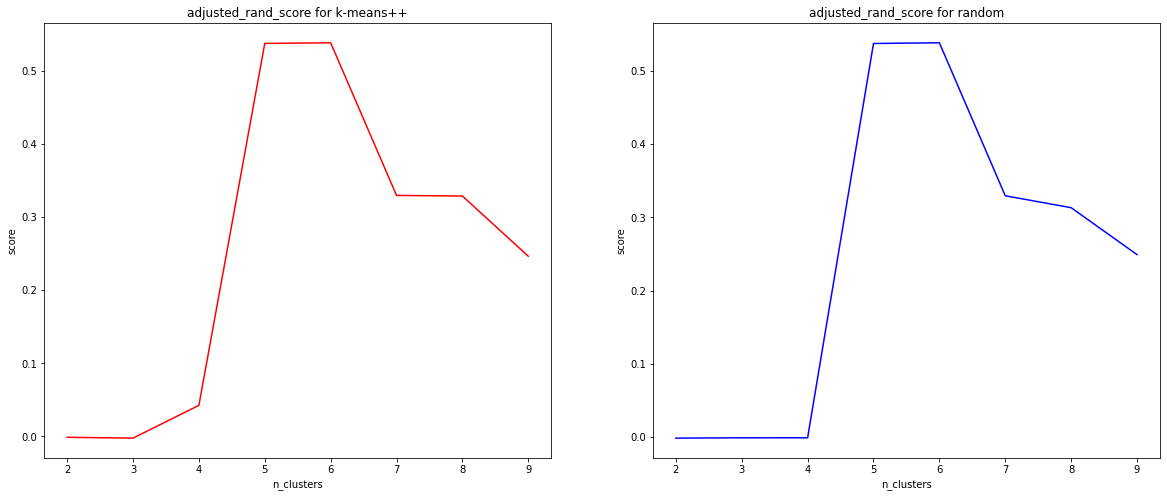

In [ ]:
k=[metrics.adjusted_rand_score(KMeans(n_clusters=n, n_init=5, init='k-means++')
.fit(data).labels_, labels) for n in range(2,10)]
r=[metrics.adjusted_rand_score(KMeans(n_clusters=n, n_init=5, init='random')
.fit(data).labels_, labels) for n in range(2,10)]
fig = plt.figure(figsize=(20, 8))
fig.add_subplot(121)
plt.plot(range(2,10), k,c='red')
plt.title("adjusted_rand_score for k-means++")
plt.xlabel("n_clusters")
plt.ylabel("score")
fig.add_subplot(122)
plt.plot(range(2,10), r,c='b')
plt.title("adjusted_rand_score for random")
plt.xlabel("n_clusters")
plt.ylabel("score")


**kmeanse can not cluser this database suitable . We expect the score was high and two circle will be clustered seperately and the plot after clustering will be the same plot which we draw befor clustering with real label. But as can you see in plot and the score of kmeans++ and random initialization, both of them show this algorithm can not cluster database firmly so we need to use other algorithms**

In [ ]:
from sklearn.cluster import DBSCAN

db = DBSCAN()

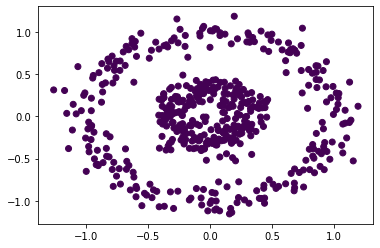

In [ ]:
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

 **the second one is min_samples which should be intiger and it is The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself and default value of it is 5**

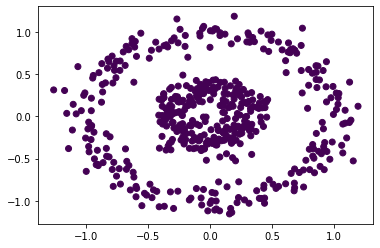

In [ ]:
db = DBSCAN()
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

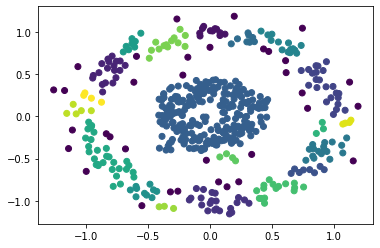

In [ ]:
db = DBSCAN(eps=0.1, min_samples=3)
predictions = db.fit_predict(data)
# equivalent to
# db.fit(data)
# predictions = db.labels_

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

DBSCAN score is 0.9881199099390607


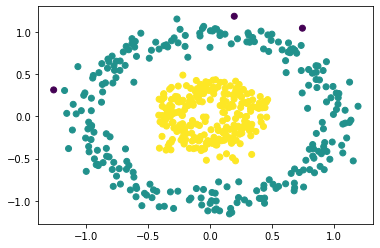

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
predictions = db.fit_predict(data)
print(f"DBSCAN score is {metrics.adjusted_rand_score(predictions,labels)}")

# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()


In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   3]
 [  0 247]
 [  1 250]]


## **I notic that db.fit(data) and db.labels_  give us predected label same as db. fit_predict. also eps and min_samples are necessary to improve this result. as you can see I change eps and min_samples and the result became very good. and two class are separated clearly**

**optional code for improve result** 

In [ ]:
# improve to result
#metrics.adjusted_rand_score(predictions, labels)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score,

par={"eps":[0.1,0.3,0.5,0.7,1,2,5],"min_samples":list(np.arange(10)),
       "metric":["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"],
                   "algorithm":["auto", "ball_tree", "kd_tree", "brute"]}
db = DBSCAN()
gs= GridSearchCV(db, param_grid=par,cv=5,scoring=accuracy_score).fit(data)
    


In [ ]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=4).fit(data)
distances, _ = nn.kneighbors(data)

In [ ]:
distances

array([[0.        , 0.0596121 , 0.06661053, 0.10706469, 0.1184472 ],
       [0.        , 0.06164458, 0.08198344, 0.09811011, 0.1067    ],
       [0.        , 0.02436692, 0.04424727, 0.04791591, 0.05608499],
       ...,
       [0.        , 0.05978277, 0.06807466, 0.08650297, 0.13393029],
       [0.        , 0.02607942, 0.03924942, 0.05455788, 0.06215275],
       [0.        , 0.01784141, 0.03378284, 0.03934516, 0.06431399]])

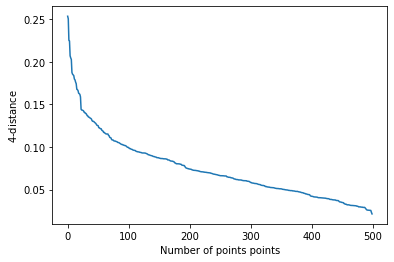

In [ ]:
distances_triees = np.sort(distances[:,-1])[::-1]
plt.plot(distances_triees)
plt.xlabel("Number of points points")
plt.ylabel("$4$-distance")
plt.show()

**answer 5:
I calculated the distance from each point to its closest neighbour by using the NearestNeighbors algorithm. The point itself is included in n_neighbors which here is equal 4. The kneighbors function returns two arrays, one which returns the distance to the closest n_neighbors points here the name of it is distances and the other which contains the index for each of those points which here the name of it is _**

**after that we sort distance and convert them descening and then draw its plot and The optimal value for epsilon will be found at the point of maximum curvature. which our plot show it is close to 0.17**
**The ideal value for ε will be equal to the distance value at the "crook of the elbow", or the point of maximum curvature. This point represents the optimization point where diminishing returns are no longer worth the additional cost. This concept of diminishing returns applies here because while increasing the number of clusters will always improve the fit of the model, it also increases the risk that overfitting will occur.**

**Reapply DBSCAN**

DBSCAN score is 0.9842238867889028


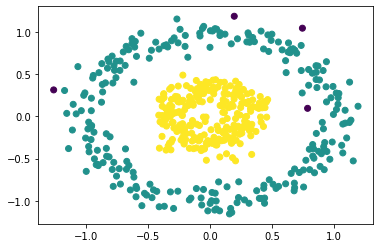

In [ ]:
"""The optimal value for epsilon will be found at the point of maximum curvature.
 which our plot show it is close to 0.17"""
dbs=DBSCAN(eps=0.17, min_samples=5)
predictions = dbs.fit_predict(data)
print(f"DBSCAN score is {metrics.adjusted_rand_score(predictions,labels)}")



# Display of the scatter plot colored by the predictions
plt.scatter(data[:,0], data[:,1], c=predictions)
plt.show()

In [ ]:
predictions

array([ 0,  0,  1,  1,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  0,  1,  0,
        1,  0,  0,  1,  0,  0,  0,  0,  1,  1,  0,  0,  1,  0,  1,  1,  1,
        0,  1,  1,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,  1,  1,  0,  0,
        0,  0,  0,  0,  0,  1,  0,  0,  1,  0,  0,  1,  1,  1,  1,  0,  1,
        1,  0,  0,  0,  0,  0,  1,  0,  1,  0,  1,  1,  1,  1,  1,  0,  0,
        0,  0,  0,  1,  1,  0,  0,  0,  1,  0,  1, -1,  1,  1,  0,  0,  1,
        1,  1,  1,  1,  0,  1,  1,  1,  1,  1,  0,  1,  0,  0,  0,  0,  0,
        0,  0,  0,  1,  0,  1,  1,  1,  0,  1,  0,  0,  1,  0,  0,  0,  1,
        0,  1,  1,  0,  0,  1, -1,  1,  0,  0,  0,  1,  0,  1,  0,  0,  1,
        0,  0,  1,  1,  0,  1,  0,  1,  1,  0,  0,  1,  0,  0,  1,  1,  1,
        0,  1,  0,  1,  0,  1,  0,  0,  1,  0,  1,  1,  0,  1,  0,  1,  0,
        1,  1,  0,  0,  0,  1, -1,  0, -1,  1,  1,  1,  0,  1,  1,  0,  1,
        0,  0,  1,  1,  0,  0,  1,  0,  0,  1,  0,  0,  0,  1,  1,  0,  1,
        1,  1,  1,  0,  1

In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ -1   4]
 [  0 246]
 [  1 250]]


In [ ]:
len(predictions[predictions==-1])

4



**we got 3 group and the observation with lable -1 have been considered as a outlier which are shown below :**

In [ ]:
da = data[predictions==-1]
da

array([[-1.13779033e+00, -3.81047533e-01],
       [ 7.45364166e-01,  1.04717589e+00],
       [-1.16977119e+00,  3.07660248e-01],
       [ 1.18466102e-03,  8.20156718e-01],
       [-1.25759097e+00,  3.14883378e-01],
       [ 2.32786510e-01, -7.75591965e-01],
       [ 9.05321888e-01, -7.06330555e-02],
       [-8.03531736e-01, -2.41728375e-01],
       [-2.65199667e-01,  1.15596475e+00],
       [-2.57624886e-01, -8.86691564e-01],
       [ 3.37009707e-01, -4.50303292e-01],
       [ 9.14636878e-01, -1.46795484e-01],
       [ 7.06936941e-02, -7.76695039e-01],
       [-3.66621699e-01, -1.06563321e+00],
       [ 1.96527578e-01,  1.18879030e+00],
       [ 1.12536772e+00,  4.07133885e-01],
       [-1.77199532e-01,  7.02603322e-01],
       [-6.79291399e-01, -3.85046153e-01],
       [-1.06242383e+00,  5.91169275e-01],
       [-2.92080432e-01, -1.09139128e+00],
       [ 7.87011082e-01,  9.62801258e-02],
       [-6.11853495e-01,  4.06181109e-01]])

In [ ]:
from sklearn.datasets import load_iris
iris=load_iris()
X, y = load_iris(return_X_y=True)

In [ ]:
df = pd.DataFrame(X, columns = iris.feature_names)
print(df.describe())

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.800000          3.000000           4.350000   
75%             6.400000          3.300000           5.100000   
max             7.900000          4.400000           6.900000   

       petal width (cm)  
count        150.000000  
mean           1.199333  
std            0.762238  
min            0.100000  
25%            0.300000  
50%            1.300000  
75%            1.800000  
max            2.500000  


In [ ]:
print(df.shape)
print(df.shape[0])

(150, 4)
150


In [ ]:
min_, max_ = X.min(axis=0), X.max(axis=0)
noise = np.random.rand(20, 4) * (max_ - min_) + min_
X = np.concatenate((X, noise))
y = np.concatenate((y, -1 * np.ones(20, dtype=int)))

**Perform a principal component analysis and visualize the Iris dataset
projected along its first two principal axes.**

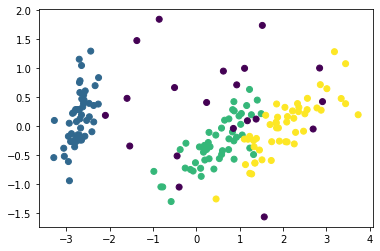

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y) and plt.show()


**Apply automatic classification using DBSCAN (work on 4-dimensional
data, not projected data!). Visualize the groups obtained in the main plan. Compare thisresult to the partitioning obtained using a k-means.**

In [ ]:
db = DBSCAN(eps=0.4, min_samples=5)
predictions = db.fit_predict(X)


In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)

[[-1 51]
 [ 0 46]
 [ 1 36]
 [ 2 15]
 [ 3 22]]


**in order to found the suitable value of eps I will use NearestNeighbors**

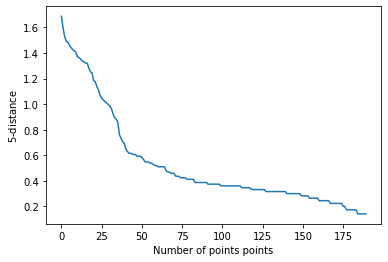

In [ ]:
nn = NearestNeighbors(n_neighbors=4).fit(X)
distances, _ = nn.kneighbors(X)
distances_triees = np.sort(distances[:,-1])[::-1]
plt.plot(distances_triees)
plt.xlabel("Number of points points")
plt.ylabel("$5$-distance")
plt.show()

**The optimal value for epsilon will be found at the point of maximum curvature.
 which our plot show it is close to 0.6**

In [ ]:
db = DBSCAN(eps=0.60, min_samples=4)
predictions = db.fit_predict(X)
print(f"DBSCAN score is {metrics.adjusted_rand_score(predictions,y)}")


DBSCAN score is 0.5650634302654086


In [ ]:
unique, counts = np.unique(predictions, return_counts=True)
print(np.asarray((unique, counts)).T)


[[-1 21]
 [ 0 49]
 [ 1 95]
 [ 2  5]]


**in thr above code -1 shows noisy data**

**for classification I used  4-dimensional
data.but for Visualize the groups obtained by DBSCAN I use PCA to dimnetion reduction from 4dimention to 3 dimention that  I can draw plot. er can not draw 4dimention plot**

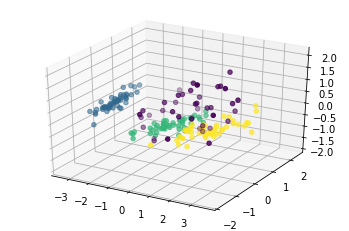

In [ ]:
#with real y which means colore is  y
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2], c=predictions) 
# plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=y)
plt.show()

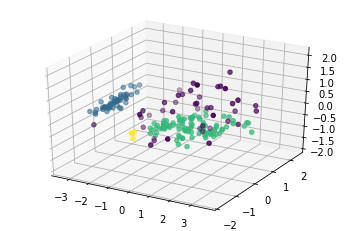

In [ ]:
 #the colore is predected y by DBSCAN
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)
# plt.scatter(X_pca[:,0], X_pca[:,1],X_pca[:,2], c=predictions) 
# plt.show()
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=predictions)
plt.show()

**IN the above plot which is base on result of DBSCAN, noisey point were shown by purple colore and have been separated from other data since I use the well eps**

In [ ]:
#kmeans
mkmeans = KMeans(n_clusters=3, n_init=1, init='k-means++').fit(X)
rkmeans = KMeans(n_clusters=3, n_init=1, init='random').fit(X)

print(f" the score of k-means++ is {metrics.adjusted_rand_score(mkmeans.labels_, y)}")
print(f" the score of random is {metrics.adjusted_rand_score(rkmeans.labels_, y)}")

 the score of k-means++ is 0.481763741448103
 the score of random is 0.4839377382831577


In [ ]:
unique, counts = np.unique(mkmeans.labels_, return_counts=True)
print(np.asarray((unique, counts)).T)

[[ 0 58]
 [ 1 81]
 [ 2 51]]


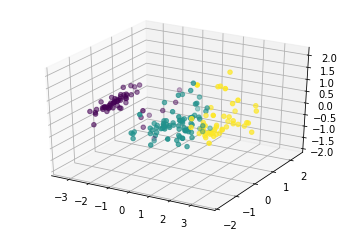

In [ ]:
#the colore is predected y by KMEANS++
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=mkmeans.labels_)
plt.show()

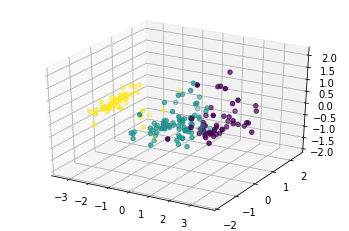

In [ ]:
#the colore is predected y by RANDOM initialization
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca[:,0],X_pca[:,1], X_pca[:,2], c=rkmeans.labels_)
plt.show()

**As can be seen this above plots and the predicted labels in DBSCAN and kmeans algorithms show that kmeans can not separate outliers from data but DBSCAN can identify them and this method calssified data to 4 classes which -1 is noisy point. But kmeans classify data into 3 classes and considered noisy pint as a good data**

In [ ]:
from sklearn import  metrics

db1 = DBSCAN(eps=0.60, min_samples=4)
predictions = db.fit_predict(X)
print(metrics.adjusted_rand_score(predictions,y))

0.5357131138368912


In [ ]:
detection_rate=metrics.accuracy_score(predictions[150:170],y[150:170])
print(detection_rate)
score=(predictions[0:150]==-1).sum()/150
print(score)

0.95
0.21333333333333335
